In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re                     #regular expressions
import spacy              #natural language processing
from nltk import tokenize # fast sentence tokenization
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.DataFrame()

In [3]:
for i in range(2, 10):
    x = 'Stream ({}).csv'
    print(x.format(i))
    x0 = pd.read_csv(x.format(i))
    data=data.append(x0, ignore_index=True)

Stream (2).csv
Stream (3).csv
Stream (4).csv
Stream (5).csv
Stream (6).csv
Stream (7).csv
Stream (8).csv
Stream (9).csv


In [4]:
data.shape

(266727, 16)

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.tail()

,Post ID,Sound Bite Text,Source Type,Post Type,Media Type,Domain,Published Date (GMT-04:00) New York,Author Gender,No. of Followers/Daily Unique Visitors,Richness,Cleaned,Cleaned_redudant,Spacy_Lemma,Phone_Category,Time
266722,http://blog.it-supplier.co.uk/hardware/lg-g6-s...,Read Next → LG G6 Smartphone LG have struck th...,Blogs,Original,No Media,blog.it-supplier.co.uk,2017-05-30,Unknown,0.0,1.0,Read → LG G6 Smartphone LG struck market lates...,read → lg g6 lg struck market latest high-end ...,read → lg g6 lg strike market latest high - en...,Samsung,After
266723,bc38ccdca0ab06e38f0f89cd7dba5831,"In January, Samsung accidentally released imag...",Blogs,Original,Link,lowcards.com,2017-06-06,Male,0.0,1.0,"January , Samsung accidentally released images...","january , accidentally released images bixby b...","january , accidentally release image bixby bet...",Samsung,After
266724,http://corporateofficehq.com/virgin-mobile-cor...,VIRGIN MOBILE DOES NOT HONOR THEIR PROMOTIONS....,Forums,Original,No Media,corporateofficehq.com,2017-05-30,Male,0.0,1.0,VIRGIN MOBILE HONOR PROMOTIONS . ’ LL SEND COD...,virgin honor promotions . ’ ll send code $ 100...,virgin honor promotion . ' will send code $ 10...,Samsung,After
266725,post_161322324079_292944997,"Samsung Galaxy S8, Galaxy S8 Plus Bluetooth Bu...",Tumblr,Original,Link,tumblr.com,2017-06-01,Unknown,0.0,0.0,"Samsung Galaxy S8 , Galaxy S8 Plus Bluetooth B...",", plus bluetooth bug fix hits uk #android #goo...",", plus bluetooth bug fix hit uk # android # go...",Samsung,After
266726,post_161322392516_336683962,Essential Phone PH-1 vs LeEco Le Pro 3 AI Eco...,Tumblr,Original,Video; Link,tumblr.com,2017-06-01,Unknown,0.0,4.0,Essential Phone PH - 1 vs LeEco Le Pro 3 AI Ec...,essential ph - 1 vs leeco le pro 3 ai eco esse...,essential ph - 1 vs leeco le pro 3 ai eco esse...,Samsung,After


In [7]:
data.shape

(266727, 15)

In [8]:
data.dropna(inplace=True)

In [9]:
data.to_csv('Mergers & Acquisitions.csv')
data.head()

,Post ID,Sound Bite Text,Source Type,Post Type,Media Type,Domain,Published Date (GMT-04:00) New York,Author Gender,No. of Followers/Daily Unique Visitors,Richness,Cleaned,Cleaned_redudant,Spacy_Lemma,Phone_Category,Time
0,post_159006163596_188342999,Samsung's Galaxy S8 phone aims to dispel the N...,Tumblr,Original,No Media,tumblr.com,2017-03-30,Unknown,0.0,0.0,Samsung's Galaxy S8 phone aims dispel Note 7 d...,samsung's aims dispel note 7 debacle technolog...,samsung 's aim dispel note 7 debacle technolog...,Samsung,After
1,post_159006076800_1185428,Microsoft Has Its Own Special Editions of the ...,Tumblr,Original,Link,tumblr.com,2017-03-30,Unknown,0.0,0.0,Microsoft Special Editions Samsung Galaxy S8 &...,microsoft special editions & + microsoft apps ...,microsoft special edition & + microsoft app lo...,Samsung,After
2,553f1ee37f.558944,Hello Malaysia MIUI-Ers ! Samsung and Microsof...,Forums,Original,No Media,en.miui.com,2017-03-31,Male,0.0,0.0,Hello Malaysia MIUI-Ers ! Samsung Microsoft ta...,hello malaysia miui-ers ! microsoft taking rel...,hello malaysia miui - er ! microsoft take rela...,Samsung,After
3,post_159006134571_336683962,Samsung Galaxy S8 vs Huawei P10 Smartphones S...,Tumblr,Original,Video; Link,tumblr.com,2017-03-30,Unknown,0.0,2.0,Samsung Galaxy S8 vs Huawei P10 Smartphones Sa...,"vs huawei p10 expected announce march 29 , 201...","vs huawei p10 expect announce march 29 , 2017 ...",Samsung,After
4,1240098101704470986,"it’s a familiar design, yes, but that doesn’t ...",Blogs,Original,No Media,smarttechsreviews.blogspot.com,2017-03-20,Unknown,0.0,4.0,"’ s familiar design , yes , doesn ’ t appealin...","’ s familiar design , yes , doesn ’ t appealin...","' s familiar design , yes , doesn ' t appealin...",Samsung,Before


In [10]:
twitter = pd.read_csv('Twitter.csv')

In [11]:
twitter.dropna(inplace=True)

### Sentiment Analysis using Vader

In [12]:
# data.drop('Sentiment Scores', axis=1, inplace=True)
twitter.head()

,Unnamed: 0,Post ID,Sound Bite Text,Source Type,Post Type,Media Type,Domain,Published Date (GMT-04:00) New York,Author Gender,No. of Followers/Daily Unique Visitors,Richness,Cleaned,Cleaned_redudant,Spacy_Lemma,Phone_Category,Time
0,0,854083902402580480,Samsung Galaxy S8 and S8 Plus undergo a Batter...,Twitter,Original,Image; Link,twitter.com,2017-04-17,Unknown,50.0,2.0,samsung galaxy s8 s8 plus undergo battery drai...,plus undergo battery drain test,plus undergo battery drain test,Samsung,After
1,1,857765152434860034,"""Another iPhone 8 leak hints at wireless charg...",Twitter,Original,Link,twitter.com,2017-04-27,Male,344.0,2.0,""" iphone 8 leak hints wireless charging "" - - ...",""" 8 leak hints wireless charging "" - - - late ...",""" 8 leak hint wireless charge "" - - - late par...",Apple,Before
2,2,875563699074850816,#Unieuro #sconta #Galaxy S8 ed S8+ del 19 e 22...,Twitter,Original,Link,twitter.com,2017-06-16,Unknown,190.0,2.0,#unieuro #sconta #galaxy s8 ed s8 + del 19 e 2...,#unieuro #sconta #galaxy ed + del 19 e 22 % #f...,# unieuro # sconta # galaxy e + del 19 e 22 % ...,Samsung,After
3,3,860350966855598082,Enjoy a FREE cup of aromatic coffee from us at...,Twitter,Original,Link,twitter.com,2017-05-05,Unknown,444.0,3.0,enjoy free cup aromatic coffee samsung galaxy ...,enjoy free cup aromatic coffee | + roadshow ha...,enjoy free cup aromatic coffee | + roadshow ha...,Samsung,After
4,4,837438402651901953,"According to reports, Samsung has begun mass p...",Twitter,Original,Image; Link,twitter.com,2017-03-02,Unknown,23.0,2.0,"according reports , samsung begun mass product...","according reports , begun mass production upco...","accord report , begin mass production upcoming …",Samsung,Before


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

compound_lemmatized = []

for i in range(len(data)):
    a = analyser.polarity_scores(data.iloc[i,12])['compound']
    compound_lemmatized.append(a)
    

data.insert(15, 'Sentiment Scores', compound_lemmatized)

compound_lemmatized = []
    
for i in range(len(twitter)):
    a = analyser.polarity_scores(twitter.iloc[i,12])['compound']
    compound_lemmatized.append(a)
    
twitter.insert(15, 'Sentiment Scores', compound_lemmatized)

In [15]:
conditions = [
    (data['Sentiment Scores'] > 0),
    (data['Sentiment Scores'] == 0),
    (data['Sentiment Scores'] < 0)]

values = ['Positive', 'Neutral', 'Negative']

# create a new column and use np.select to assign values to it using our lists as arguments
data.loc[:,'Calculated Sentiment'] = np.select(conditions, values)

In [17]:
conditions = [
    (twitter['Sentiment Scores'] > 0),
    (twitter['Sentiment Scores'] == 0),
    (twitter['Sentiment Scores'] < 0)]

values = ['Positive', 'Neutral', 'Negative']


twitter.loc[:,'Calculated Sentiment'] = np.select(conditions, values)

In [18]:
Ntwitter_samsung = data[data['Phone_Category']=='Samsung']
Ntwitter_apple = data[data['Phone_Category']=='Apple']
twitter_samsung = twitter[twitter['Phone_Category']=='Samsung']
twitter_apple = twitter[twitter['Phone_Category']=='Apple']

In [140]:
merged = data.append(twitter, ignore_index=True)

# What were the most important attributes for each product?

# LDA Topic Modeling with TF-IDF Vectorizer

## NON-TWITTER

In [141]:
vocab_size = 1000
from sklearn.feature_extraction.text import TfidfVectorizer
num_topics = 7

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)


In [142]:
samsung_idx=data.loc[data['Phone_Category']=="Samsung",'Spacy_Lemma'].index
iphone_idx=data.loc[data['Phone_Category']=="Apple",'Spacy_Lemma'].index

### Samsung

In [143]:
# TfidVectorizer does tokenization and can remove terms that occur too frequently, not frequently enough, or that are stop words

tf_vectorizer = TfidfVectorizer()

tf_samsung = tf_vectorizer.fit_transform(data.loc[data['Phone_Category']=="Samsung",'Spacy_Lemma'])

In [144]:
#SAMSUNG LDA + Sentiment Analysis (Non-Twitter)

lda.fit(tf_samsung)

lda.components_.shape
lda.components_.sum(axis=1)
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
topic_word_distributions.sum(axis=1)  

num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)


Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
twitter : 0.024134911045342003
tag : 0.014971456732601503
ifttt : 0.013383867512045915
dex : 0.012484987363340135
android : 0.008921446046269911
rt : 0.00823089036742011
desktop : 0.008189602004531846
tech : 0.0072960223820639075
trend : 0.006435987618901685
canada : 0.006257785252943154
dock : 0.006227918473726921
window : 0.004992687763193611
station : 0.004634439825742189
digital : 0.003775398151069891
technology : 0.003538345248510163
pc : 0.00335172479288994
authority : 0.0033339560877007762
mobile : 0.0031814727107621283
androidauth : 0.0030139232894613264
gb : 0.002964012003658322

[Topic 1]
samsung : 0.01731557156737172
galaxys8 : 0.014927682077203016
galaxy : 0.012203361256804678
s8 : 0.010879034261229097
smartphone : 0.008151012117955618
red : 0.007780932861305597
samsunggalaxys8 : 0.007734584970383794
tint : 0.007107344213683304
galaxys8plus : 0.006505108296051139
samsunggalaxy : 0.0

In [145]:
#18
data['Topic']='**'
data.tail()

,Post ID,Sound Bite Text,Source Type,Post Type,Media Type,Domain,Published Date (GMT-04:00) New York,Author Gender,No. of Followers/Daily Unique Visitors,Richness,Cleaned,Cleaned_redudant,Spacy_Lemma,Phone_Category,Time,Sentiment Scores,Calculated Sentiment,Topic,month
266722,http://blog.it-supplier.co.uk/hardware/lg-g6-s...,Read Next → LG G6 Smartphone LG have struck th...,Blogs,Original,No Media,blog.it-supplier.co.uk,2017-05-30,Unknown,0.0,1.0,Read → LG G6 Smartphone LG struck market lates...,read → lg g6 lg struck market latest high-end ...,read → lg g6 lg strike market latest high - en...,Samsung,After,0.8885,Positive,**,5
266723,bc38ccdca0ab06e38f0f89cd7dba5831,"In January, Samsung accidentally released imag...",Blogs,Original,Link,lowcards.com,2017-06-06,Male,0.0,1.0,"January , Samsung accidentally released images...","january , accidentally released images bixby b...","january , accidentally release image bixby bet...",Samsung,After,0.5859,Positive,**,6
266724,http://corporateofficehq.com/virgin-mobile-cor...,VIRGIN MOBILE DOES NOT HONOR THEIR PROMOTIONS....,Forums,Original,No Media,corporateofficehq.com,2017-05-30,Male,0.0,1.0,VIRGIN MOBILE HONOR PROMOTIONS . ’ LL SEND COD...,virgin honor promotions . ’ ll send code $ 100...,virgin honor promotion . ' will send code $ 10...,Samsung,After,0.6884,Positive,**,5
266725,post_161322324079_292944997,"Samsung Galaxy S8, Galaxy S8 Plus Bluetooth Bu...",Tumblr,Original,Link,tumblr.com,2017-06-01,Unknown,0.0,0.0,"Samsung Galaxy S8 , Galaxy S8 Plus Bluetooth B...",", plus bluetooth bug fix hits uk #android #goo...",", plus bluetooth bug fix hit uk # android # go...",Samsung,After,0.0000,Neutral,**,6
266726,post_161322392516_336683962,Essential Phone PH-1 vs LeEco Le Pro 3 AI Eco...,Tumblr,Original,Video; Link,tumblr.com,2017-06-01,Unknown,0.0,4.0,Essential Phone PH - 1 vs LeEco Le Pro 3 AI Ec...,essential ph - 1 vs leeco le pro 3 ai eco esse...,essential ph - 1 vs leeco le pro 3 ai eco esse...,Samsung,After,0.9231,Positive,**,6


In [146]:
#Topic Assignment
samsung_topic=[]
doc_topic = lda.transform(tf_samsung)
print(doc_topic.shape)
for n in range(doc_topic.shape[0]):
    #print(samsung_idx[n])
    samsung_topic.append(doc_topic[n].argmax())
data.loc[samsung_idx,'Topic']=samsung_topic
    

(138769, 7)


### Apple 

In [147]:
tf_vectorizer = TfidfVectorizer()

tf_iphone = tf_vectorizer.fit_transform(data.loc[data['Phone_Category']=="Apple",'Spacy_Lemma'])

In [148]:
lda.fit(tf_iphone)

lda.components_.shape
lda.components_.sum(axis=1)
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
topic_word_distributions.sum(axis=1)  

num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
iphone8 : 0.020066084051958383
iphone8plus : 0.01565370635228264
apple : 0.013810242456569508
iphone : 0.013658093637553716
plus : 0.010383727625501644
iphonex : 0.006854303116035681
new : 0.005476726369671286
tag : 0.004749013539499582
love : 0.004305986716389199
gold : 0.003936126511930694
portrait : 0.003451472451873428
photography : 0.0032215362454885038
camera : 0.003033786187357917
shotoniphone : 0.002922695988413891
iphone7 : 0.0028724179046264986
get : 0.0028356950987211346
photo : 0.0027542480444217084
instagood : 0.0027337367141822234
smartphone : 0.0027304395180591935
shoot : 0.0026716102028204176

[Topic 1]
battery : 0.008776271353065718
swell : 0.0069650123358002015
report : 0.006173659941593303
open : 0.005528939381513937
plus : 0.004965896178232355
cnet : 0.004732255971372859
investigate : 0.00453396744191214
tag : 0.004009188553398592
split : 0.003566381809682284
ifttt : 0.00321

In [149]:
iphone_topic=[]
doc_topic = lda.transform(tf_iphone)
print(doc_topic.shape)
for n in range(doc_topic.shape[0]):
    iphone_topic.append(doc_topic[n].argmax())
data.loc[iphone_idx,'Topic']=iphone_topic

(127937, 7)


## TWITTER

In [150]:
scleaned_tweets = []
t_tokenizer= TweetTokenizer()
similar_words =['s8', 'galaxy', 'samsung', 'iphone', 'apple', 'phone', 'smartphone', 'device', 'phones', 'mobile', 'smartphones', 'mobiles', 'devices']
#for tw in cleaned_tweets:
for tw in twitter['Spacy_Lemma']:
    cleaned = [word for word in t_tokenizer.tokenize(tw.lower()) if word not in similar_words]
    scleaned_tweets.append(' '.join(cleaned))

##Inserting the clean tokens to our original dataframe
#data.insert(11, 'Cleaned_lemma', scleaned_tweets)
twitter['Spacy_Lemma']=scleaned_tweets

In [151]:
vocab_size = 1000
from sklearn.feature_extraction.text import TfidfVectorizer
num_topics = 7

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)


In [152]:
samsung_idx=twitter.loc[twitter['Phone_Category']=="Samsung",'Spacy_Lemma'].index
iphone_idx=twitter.loc[twitter['Phone_Category']=="Apple",'Spacy_Lemma'].index


In [153]:
twitter.shape

(20150, 20)

### Samsung 

In [154]:
# TfidVectorizer does tokenization and can remove terms that occur too frequently, not frequently enough, or that are stop words

tf_vectorizer = TfidfVectorizer()

tf_samsung = tf_vectorizer.fit_transform(twitter.loc[twitter['Phone_Category']=="Samsung",'Spacy_Lemma'])

In [155]:
#SAMSUNG LDA + Sentiment Analysis (Non-Twitter)

lda.fit(tf_samsung)

lda.components_.shape
lda.components_.sum(axis=1)
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
topic_word_distributions.sum(axis=1)  

num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)


Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
vs : 0.020833131810916384
lg : 0.014064456481852412
launch : 0.01336749076089498
new : 0.012911469160967118
g6 : 0.012829624541511922
bixby : 0.012574221606395148
be : 0.011237649106944091
youtube : 0.01123692031551001
assistant : 0.010429141300918886
video : 0.010179461742024287
like : 0.010102618847657579
official : 0.009934228951794946
buy : 0.009844973536748484
voice : 0.009042569257573583
test : 0.00792800294184433
event : 0.007675174030514374
google : 0.007669977739468326
pixel : 0.006894970041557249
plus : 0.006877363340677207
not : 0.006556940673120018

[Topic 1]
galaxys : 0.03334532940325823
youtube : 0.014547829012383525
review : 0.013745068669835379
video : 0.012676515471061502
like : 0.01183180221214479
8p : 0.009959650580515811
android : 0.008179761586070644
case : 0.008019971895479917
color : 0.00790915182848033
good : 0.007626715997108352
plus : 0.0072081535560296825
lus : 0.0058

In [156]:
#18
twitter['Topic']='**'
twitter.tail()

,Unnamed: 0,Post ID,Sound Bite Text,Source Type,Post Type,Media Type,Domain,Published Date (GMT-04:00) New York,Author Gender,No. of Followers/Daily Unique Visitors,Richness,Cleaned,Cleaned_redudant,Spacy_Lemma,Phone_Category,Sentiment Scores,Time,Calculated Sentiment,Topic,month
20165,29967,904257629828120577,Need this iPhone 8 ??????,Twitter,Original,No Media,twitter.com,2017-09-03,Unknown,1587.0,1.0,Need iPhone 8 ? ? ?,need 8 ? ? ?,need 8 ? ? ?,Apple,0.0000,Before,Neutral,**,9
20166,29968,911600148626644992,"Man flies in from India, queues 13hrs for iPho...",Twitter,Original,Link,twitter.com,2017-09-23,Unknown,257.0,1.0,"man flies india , queues 13hrs iphone 8","man flies india , queues 13hrs 8","man fly india , queues 13hrs 8",Apple,0.0000,After,Neutral,**,9
20167,29969,924923926135926784,when you have really nice headphones and the i...,Twitter,Original,No Media,twitter.com,2017-10-30,Unknown,302.0,1.0,nice headphones iPhone 8 < < <,nice headphones 8 < < <,nice headphone 8 < < <,Apple,0.4215,After,Positive,**,10
20168,29970,907714982875418624,"Apple unveils three new iPhones: iPhone 8, iPh...",Twitter,Original,Image; Link,twitter.com,2017-09-12,Unknown,413.0,1.0,"apple unveils new iphones : iphone 8 , iphone ...","unveils new iphones : 8 , 8 plus , x …","unveil new : 8 , 8 plus , x …",Apple,0.0000,Before,Neutral,**,9
20169,29971,909878467398844416,Trianium iPhone 8 Plus Case $0.63 Free Shippin...,Twitter,Original,Link,twitter.com,2017-09-18,Unknown,406.0,2.0,trianium iphone 8 plus case $ 0.63 free shippi...,trianium 8 plus case $ 0.63 free shipping ( ),trianium 8 plus case $ 0.63 free shipping ( ),Apple,0.5106,Before,Positive,**,9


In [157]:
#Topic Assignment
samsung_topic=[]
doc_topic = lda.transform(tf_samsung)
print(doc_topic.shape)
for n in range(doc_topic.shape[0]):
    #print(samsung_idx[n])
    samsung_topic.append(doc_topic[n].argmax())
twitter.loc[samsung_idx,'Topic']=samsung_topic
    

(11857, 7)


### Apple 

In [158]:
tf_vectorizer = TfidfVectorizer()

tf_iphone = tf_vectorizer.fit_transform(twitter.loc[twitter['Phone_Category']=="Apple",'Spacy_Lemma'])

In [159]:
lda.fit(tf_iphone)

lda.components_.shape
lda.components_.sum(axis=1)
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
topic_word_distributions.sum(axis=1)  

num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
order : 0.015087444941494074
confirm : 0.010589371083828287
expensive : 0.009764519722306424
september : 0.009498808356850338
pre : 0.009376833760766088
new : 0.008598436957879976
leak : 0.008085213193829497
plus : 0.007952990078398902
big : 0.007695524912175906
facial : 0.0068107454789036
ship : 0.00679287546121885
massive : 0.0063706411798818904
launch : 0.006358689446541786
recognition : 0.006005092766624782
rumor : 0.005857455308045022
edition : 0.005324963388668469
call : 0.005309437411344718
durable : 0.005280272512531946
detail : 0.005260762770837613
bad : 0.005205309417709748

[Topic 1]
plus : 0.021097307192294412
wireless : 0.012447722405777097
buy : 0.01181658707709917
new : 0.01048236937395689
charging : 0.009885217721010276
not : 0.008772185178145743
do : 0.00785517741681556
get : 0.00686632590979197
tomorrow : 0.006720031498577046
gb : 0.0057954549104119995
look : 0.005770411436783

In [160]:
iphone_topic=[]
doc_topic = lda.transform(tf_iphone)
print(doc_topic.shape)
for n in range(doc_topic.shape[0]):
    iphone_topic.append(doc_topic[n].argmax())
twitter.loc[iphone_idx,'Topic']=iphone_topic
    

(8293, 7)


# --------------------X------------------------X------------------------------

### POS Tagging for Top Attributes

#### Top Attributes - iPhone

In [40]:
##Sorting all the cleaned tokens into their part of speech list using spacy.pos_

nlp = spacy.load('en_core_web_sm')
noun_list_pos = []
noun_list_neg = [] 
adj_list_pos = []
adj_list_neg = []

noun_list_apple_pos= []
adj_list_apple_pos = []
noun_list_apple_neg= []
adj_list_apple_neg = []

noun_list_samsung_pos = []
adj_list_samsung_pos = []
noun_list_samsung_neg = []
adj_list_samsung_neg = []

for i in range(0,len(merged)):  
    if(merged.iloc[i,13]=="Apple"):
        doc = nlp(merged.iloc[i,10])
        for token in doc:
            if token.pos_ =='NOUN':
                if(merged.iloc[i,16] == 'Positive'):
                    noun_list_pos.append([token,merged.iloc[i,15]])
                    noun_list_apple_pos.append([token,merged.iloc[i,15]])
                else:
                    noun_list_neg.append([token,merged.iloc[i,15]])
                    noun_list_apple_neg.append([token,merged.iloc[i,15]])                  
            elif token.pos_ == 'ADJ':
                if(merged.iloc[i,16] == 'Positive'):
                    adj_list_pos.append([token,merged.iloc[i,15]])
                    adj_list_apple_pos.append([token,merged.iloc[i,15]])
                else:
                    adj_list_neg.append([token,merged.iloc[i,15]])
                    adj_list_apple_neg.append([token,merged.iloc[i,15]])   
    elif(merged.iloc[i,13]=="Samsung"):
        doc = nlp(merged.iloc[i,10])
        for token in doc:
            if token.pos_ =='NOUN':
                if(merged.iloc[i,16] == 'Positive'):
                    noun_list_pos.append([token,merged.iloc[i,15]])
                    noun_list_samsung_pos.append([token,merged.iloc[i,15]])
                else:
                    noun_list_neg.append([token,merged.iloc[i,15]])
                    noun_list_samsung_neg.append([token,merged.iloc[i,15]])   
            elif token.pos_ == 'ADJ':
                if(merged.iloc[i,16] == 'Positive'):
                    adj_list_pos.append([token,merged.iloc[i,15]])
                    adj_list_samsung_pos.append([token,merged.iloc[i,15]])
                else:
                    adj_list_neg.append([token,merged.iloc[i,15]])
                    adj_list_samsung_neg.append([token,merged.iloc[i,15]])   

In [41]:
import string

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)    

    # removing the emojies              
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)  
   
    return text

In [42]:
tmp_noun_list_apple_neg = [[cleaning(str(i[0])),i[1]] for i in noun_list_apple_neg]
tmp_noun_list_apple_pos = [[cleaning(str(i[0])),i[1]] for i in noun_list_apple_pos]
tmp_adj_list_apple_pos = [[cleaning(str(i[0])),i[1]] for i in adj_list_apple_pos]
tmp_adj_list_apple_neg = [[cleaning(str(i[0])),i[1]] for i in adj_list_apple_neg]

tmp_noun_list_samsung_neg = [[cleaning(str(i[0])),i[1]] for i in noun_list_samsung_neg]
tmp_noun_list_samsung_pos = [[cleaning(str(i[0])),i[1]] for i in noun_list_samsung_pos]
tmp_adj_list_samsung_pos = [[cleaning(str(i[0])),i[1]] for i in adj_list_samsung_pos]
tmp_adj_list_samsung_neg = [[cleaning(str(i[0])),i[1]] for i in adj_list_samsung_neg]


tmp_noun_list_neg = [[cleaning(str(i[0])),i[1]] for i in noun_list_neg]
tmp_noun_list_pos = [[cleaning(str(i[0])),i[1]] for i in noun_list_pos]
tmp_adj_list_pos = [[cleaning(str(i[0])),i[1]] for i in adj_list_pos]
tmp_adj_list_neg = [[cleaning(str(i[0])),i[1]] for i in adj_list_neg]

In [43]:
tmp_noun_list_apple_pos

[['ad', 0.6124],
 ['controversy', 0.6124],
 ['expectations', 0.6124],
 ['cycle', 0.6124],
 ['investment', 0.6124],
 ['advice', 0.6124],
 ['reality', 0.6597],
 ['reality', 0.6597],
 ['reality', 0.6597],
 ['law', 0.6597],
 ['professor', 0.6597],
 ['article', 0.6597],
 ['law', 0.6597],
 ['reality', 0.6597],
 ['days', 0.6597],
 ['headset', 0.6597],
 ['market', 0.6597],
 ['devices', 0.6597],
 ['subscription', 0.6597],
 ['blog', 0.6597],
 ['reality', 0.6597],
 ['toy', 0.6597],
 ['line', 0.6597],
 ['toys', 0.6597],
 ['spring', 0.6597],
 ['life', 0.6597],
 ['tablet', 0.6597],
 ['thanks', 0.6597],
 ['reality', 0.6597],
 ['toy', 0.6597],
 ['start', 0.6597],
 ['reality', 0.6597],
 ['ambitions', 0.6597],
 ['press', 0.6597],
 ['release', 0.6597],
 ['blog', 0.6597],
 ['assortment', 0.6597],
 ['reality', 0.6597],
 ['reality', 0.6597],
 ['cornerstones', 0.6597],
 ['company', 0.6597],
 ['flag', 0.6597],
 ['luxury', 0.6597],
 ['e', 0.6597],
 ['', 0.6597],
 ['commerce', 0.6597],
 ['internet', 0.6597],
 [

## Question 2 : Apple Attribute Analysis

## Positive Attributes

### Most Frequent Positive Attributes + Average Sentiments of those attributes

In [44]:
#NOUNS
from collections import Counter
print("Most frequent Positive Noun for iPhone- ")
noun = '' 
for i in range(len(tmp_noun_list_apple_pos)):
    if(len(tmp_noun_list_apple_pos[i][0]) > 2):
        noun += ' ' + tmp_noun_list_apple_pos[i][0]
split_it = noun.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(10)
most = [word[0] for word in most_occur]
word_and_sent = dict()
for word in most:
    sent = 0
    count = 0
    for noun in tmp_noun_list_apple_pos:
        if noun[0] == word:
            count+=1
            sent+=noun[1]
    if(count > 0):
        sent = sent/count
        word_and_sent[word] = sent
print(*most_occur,sep='\n')

Most frequent Positive Noun for iPhone- 
('iphone', 23904)
('phone', 22639)
('camera', 19394)
('year', 12715)
('screen', 12198)
('device', 11291)
('design', 10747)
('case', 10576)
('display', 10136)
('time', 9997)


Text(0.5, 0, 'Frequency')

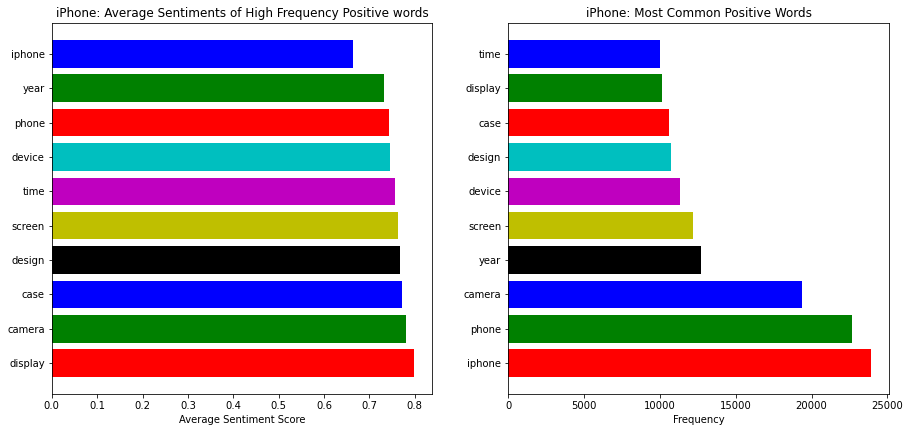

In [45]:
word_and_sent =  dict(sorted(word_and_sent.items(), key=lambda x: x[1],reverse=True))
words = [word[0] for word in most_occur]
freq = [word[1] for word in most_occur]
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.barh(list(word_and_sent.keys()),list(word_and_sent.values()), color = list('rgbkymc'))
plt.title('iPhone: Average Sentiments of High Frequency Positive words')
plt.xlabel('Average Sentiment Score')

plt.subplot(2,2,2)
plt.barh(words,freq, color = list('rgbkymc'))
plt.title('iPhone: Most Common Positive Words')
plt.xlabel('Frequency')



In [46]:
len(tmp_adj_list_apple_pos)

518033

### Most Common Positive Adjectives

In [47]:
#ADJECTIVES
from collections import Counter

print("Most frequent Positive Adjectives for iPhone- ")
adj = '' 
for i in range(len(tmp_adj_list_apple_pos)):
    if(len(tmp_adj_list_apple_pos[i][0]) > 2):
        adj += ' ' + tmp_adj_list_apple_pos[i][0]
split_it = adj.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(10)
most = [word[0] for word in most_occur]
word_and_sent = dict()
for word in most:
    sent = 0
    count = 0
    for adj in tmp_adj_list_apple_pos:
        if adj[0] == word:
            count+=1
            sent+=adj[1]
    if(count > 0):
        sent = sent/count
        word_and_sent[word] = sent
print(*most_occur,sep='\n')

Most frequent Positive Adjectives for iPhone- 
('new', 54665)
('wireless', 9182)
('best', 7470)
('available', 7396)
('latest', 6642)
('free', 6622)
('good', 6010)
('better', 5961)
('different', 4466)
('great', 4440)


Text(0.5, 0, 'Frequency')

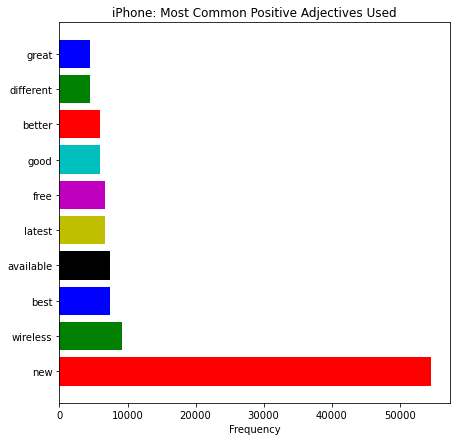

In [48]:
word_and_sent =  dict(sorted(word_and_sent.items(), key=lambda x: x[1],reverse=True))
words = [word[0] for word in most_occur]
freq = [word[1] for word in most_occur]
plt.figure(figsize=(7,7))

plt.barh(words,freq, color = list('rgbkymc'))
plt.title('iPhone: Most Common Positive Adjectives Used')
plt.xlabel('Frequency')

## Negative Attributes

### Most Frequent Negative Attributes + Average Sentiments of those attributes

In [49]:
#NOUNS
from collections import Counter
print("Most frequent Negative Noun for iPhone- ")
noun = '' 
for i in range(len(tmp_noun_list_apple_neg)):
    if(len(tmp_noun_list_apple_neg[i][0]) > 2):
        noun += ' ' + tmp_noun_list_apple_neg[i][0]
split_it = noun.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(10)
most = [word[0] for word in most_occur]
word_and_sent = dict()
for word in most:
    sent = 0
    count = 0
    for noun in tmp_noun_list_apple_neg:
        if noun[0] == word:
            count+=1
            sent+=noun[1]
    if(count > 0):
        sent = sent/count
        word_and_sent[word] = sent
print(*most_occur,sep='\n')

Most frequent Negative Noun for iPhone- 
('iphone', 6222)
('phone', 5175)
('device', 2771)
('screen', 2659)
('year', 2648)
('design', 2574)
('apple', 2321)
('camera', 2221)
('time', 2130)
('battery', 2015)


Text(0.5, 0, 'Frequency')

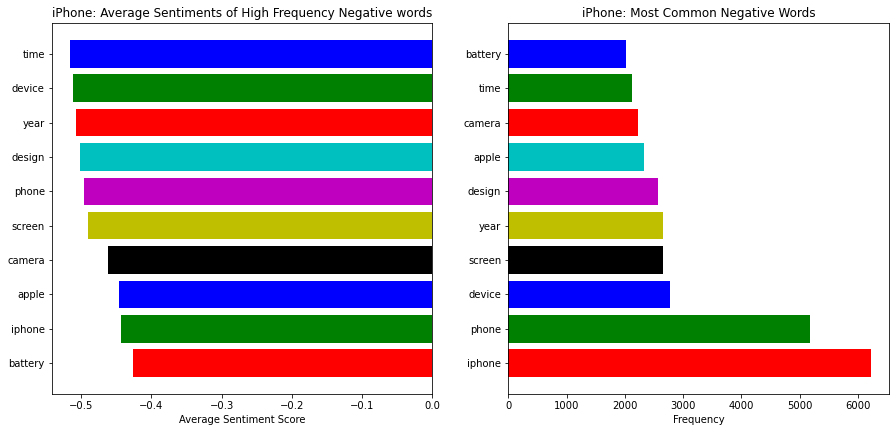

In [50]:
word_and_sent =  dict(sorted(word_and_sent.items(), key=lambda x: x[1],reverse=True))
words = [word[0] for word in most_occur]
freq = [word[1] for word in most_occur]
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.barh(list(word_and_sent.keys()),list(word_and_sent.values()), color = list('rgbkymc'))
plt.title('iPhone: Average Sentiments of High Frequency Negative words')
plt.xlabel('Average Sentiment Score')

plt.subplot(2,2,2)
plt.barh(words,freq, color = list('rgbkymc'))
plt.title('iPhone: Most Common Negative Words')
plt.xlabel('Frequency')


### Most Common Negative Adjectives

In [51]:
#ADJECTIVES
from collections import Counter

print("Most frequent Negative Adjectives for iPhone- ")
adj = '' 
for i in range(len(tmp_adj_list_apple_neg)):
    if(len(tmp_adj_list_apple_pos[i][0]) > 2):
        adj += ' ' + tmp_adj_list_apple_neg[i][0]
split_it = adj.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(10)
most = [word[0] for word in most_occur]
word_and_sent = dict()
for word in most:
    sent = 0
    count = 0
    for adj in tmp_adj_list_apple_neg:
        if adj[0] == word:
            count+=1
            sent+=adj[1]
    if(count > 0):
        sent = sent/count
        word_and_sent[word] = sent
print(*most_occur,sep='\n')

Most frequent Negative Adjectives for iPhone- 
('new', 9583)
('latest', 1425)
('open', 1157)
('upcoming', 941)
('available', 863)
('bad', 803)
('irrelevant', 800)
('dual', 776)
('wireless', 774)
('previous', 685)


Text(0.5, 0, 'Frequency')

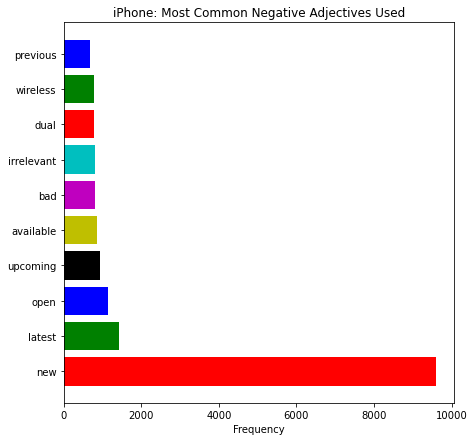

In [52]:
word_and_sent =  dict(sorted(word_and_sent.items(), key=lambda x: x[1],reverse=True))
words = [word[0] for word in most_occur]
freq = [word[1] for word in most_occur]
plt.figure(figsize=(7,7))

plt.barh(words,freq, color = list('rgbkymc'))
plt.title('iPhone: Most Common Negative Adjectives Used')
plt.xlabel('Frequency')

## Question 2 : Samsung Attribute Analysis

## Positive Attributes

### Most Frequent Positive Attributes + Average Sentiments of those attributes

In [53]:
#NOUNS
from collections import Counter
print("Most frequent Positive Noun for Samsung- ")
noun = '' 
for i in range(len(tmp_noun_list_samsung_pos)):
    if(len(tmp_noun_list_samsung_pos[i][0]) > 2):
        noun += ' ' + tmp_noun_list_samsung_pos[i][0]
split_it = noun.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(10)
most = [word[0] for word in most_occur]
word_and_sent = dict()
for word in most:
    sent = 0
    count = 0
    for noun in tmp_noun_list_samsung_pos:
        if noun[0] == word:
            count+=1
            sent+=noun[1]
    if(count > 0):
        sent = sent/count
        word_and_sent[word] = sent
print(*most_occur,sep='\n')

Most frequent Positive Noun for Samsung- 
('phone', 52932)
('screen', 27653)
('camera', 21932)
('device', 20415)
('phones', 20004)
('display', 19005)
('flagship', 16755)
('devices', 16433)
('smartphone', 13999)
('time', 13556)


Text(0.5, 0, 'Frequency')

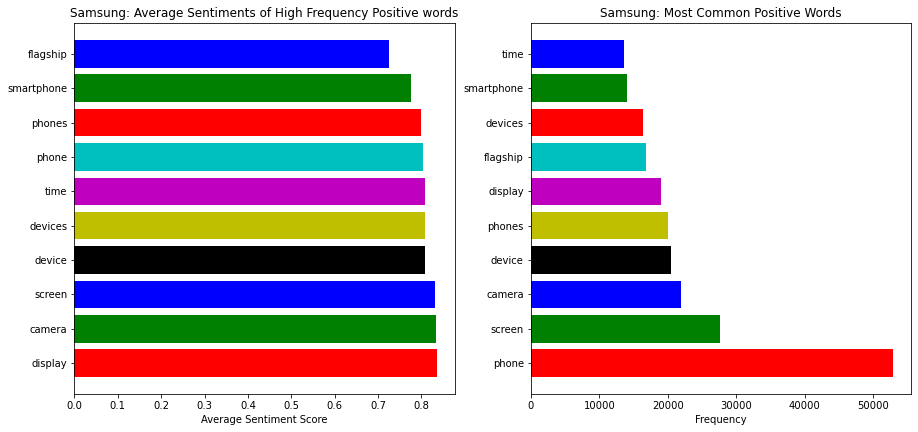

In [54]:
word_and_sent =  dict(sorted(word_and_sent.items(), key=lambda x: x[1],reverse=True))
words = [word[0] for word in most_occur]
freq = [word[1] for word in most_occur]
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.barh(list(word_and_sent.keys()),list(word_and_sent.values()), color = list('rgbkymc'))
plt.title('Samsung: Average Sentiments of High Frequency Positive words')
plt.xlabel('Average Sentiment Score')

plt.subplot(2,2,2)
plt.barh(words,freq, color = list('rgbkymc'))
plt.title('Samsung: Most Common Positive Words')
plt.xlabel('Frequency')



### Most Common Positive Adjectives

In [55]:
#ADJECTIVES
from collections import Counter

print("Most frequent Positive Adjectives for Samsung- ")
adj = '' 
for i in range(len(tmp_adj_list_samsung_pos)):
    if(len(tmp_adj_list_samsung_pos[i][0]) > 2):
        adj += ' ' + tmp_adj_list_samsung_pos[i][0]
split_it = adj.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(10)
most = [word[0] for word in most_occur]
word_and_sent = dict()
for word in most:
    sent = 0
    count = 0
    for adj in tmp_adj_list_samsung_pos:
        if adj[0] == word:
            count+=1
            sent+=adj[1]
    if(count > 0):
        sent = sent/count
        word_and_sent[word] = sent
print(*most_occur,sep='\n')

Most frequent Positive Adjectives for Samsung- 
('new', 49975)
('available', 14166)
('best', 12495)
('latest', 10578)
('good', 9239)
('great', 8728)
('smartphone', 8178)
('free', 7241)
('pre', 6707)
('big', 6381)


Text(0.5, 0, 'Frequency')

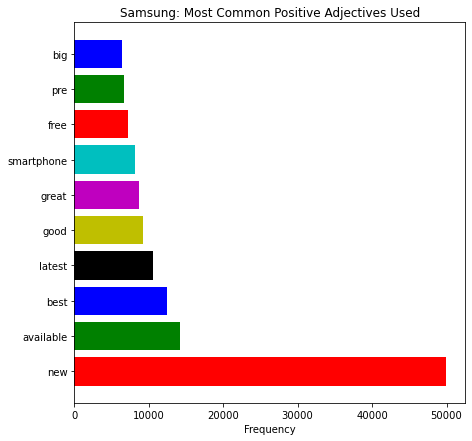

In [56]:
word_and_sent =  dict(sorted(word_and_sent.items(), key=lambda x: x[1],reverse=True))
words = [word[0] for word in most_occur]
freq = [word[1] for word in most_occur]
plt.figure(figsize=(7,7))

plt.barh(words,freq, color = list('rgbkymc'))
plt.title('Samsung: Most Common Positive Adjectives Used')
plt.xlabel('Frequency')

## Negative Attributes

### Most Frequent Negative Attributes + Average Sentiments of those attributes

In [57]:
#NOUNS
from collections import Counter
print("Most frequent Negative Noun for Samsung- ")
noun = '' 
for i in range(len(tmp_noun_list_samsung_neg)):
    if(len(tmp_noun_list_samsung_neg[i][0]) > 2):
        noun += ' ' + tmp_noun_list_samsung_neg[i][0]
split_it = noun.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(10)
most = [word[0] for word in most_occur]
word_and_sent = dict()
for word in most:
    sent = 0
    count = 0
    for noun in tmp_noun_list_samsung_neg:
        if noun[0] == word:
            count+=1
            sent+=noun[1]
    if(count > 0):
        sent = sent/count
        word_and_sent[word] = sent
print(*most_occur,sep='\n')

Most frequent Negative Noun for Samsung- 
('phone', 7129)
('screen', 3585)
('device', 2938)
('flagship', 2269)
('leaks', 2262)
('time', 2259)
('phones', 2209)
('company', 2191)
('problem', 2159)
('camera', 2145)


Text(0.5, 0, 'Frequency')

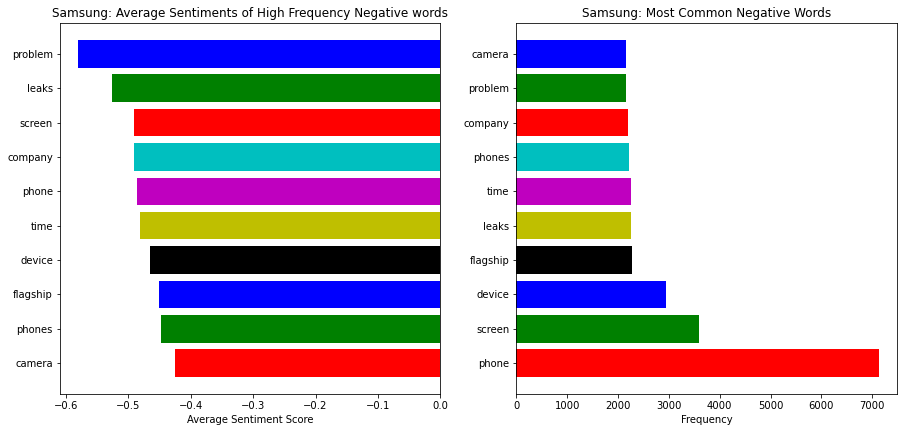

In [58]:
word_and_sent =  dict(sorted(word_and_sent.items(), key=lambda x: x[1],reverse=True))
words = [word[0] for word in most_occur]
freq = [word[1] for word in most_occur]
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.barh(list(word_and_sent.keys()),list(word_and_sent.values()), color = list('rgbkymc'))
plt.title('Samsung: Average Sentiments of High Frequency Negative words')
plt.xlabel('Average Sentiment Score')

plt.subplot(2,2,2)
plt.barh(words,freq, color = list('rgbkymc'))
plt.title('Samsung: Most Common Negative Words')
plt.xlabel('Frequency')


### Most Common Negative Adjectives

In [59]:
#ADJECTIVES
from collections import Counter

print("Most frequent Negative Adjectives for Samsung- ")
adj = '' 
for i in range(len(tmp_adj_list_samsung_neg)):
    if(len(tmp_adj_list_apple_pos[i][0]) > 2):
        adj += ' ' + tmp_adj_list_samsung_neg[i][0]
split_it = adj.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(10)
most = [word[0] for word in most_occur]
word_and_sent = dict()
for word in most:
    sent = 0
    count = 0
    for adj in tmp_adj_list_samsung_neg:
        if adj[0] == word:
            count+=1
            sent+=adj[1]
    if(count > 0):
        sent = sent/count
        word_and_sent[word] = sent
print(*most_occur,sep='\n')

Most frequent Negative Adjectives for Samsung- 
('new', 7195)
('s8', 2502)
('latest', 1459)
('red', 1360)
('available', 1253)
('upcoming', 1043)
('korean', 925)
('official', 903)
('smartphone', 843)
('black', 819)


Text(0.5, 0, 'Frequency')

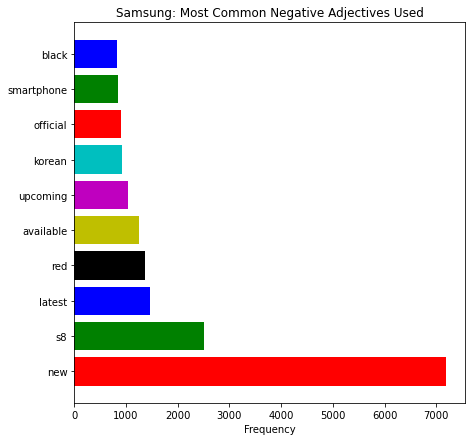

In [60]:
word_and_sent =  dict(sorted(word_and_sent.items(), key=lambda x: x[1],reverse=True))
words = [word[0] for word in most_occur]
freq = [word[1] for word in most_occur]
plt.figure(figsize=(7,7))

plt.barh(words,freq, color = list('rgbkymc'))
plt.title('Samsung: Most Common Negative Adjectives Used')
plt.xlabel('Frequency')

# Q3) How did consumers feel about the Quality, Price and “Value” for each product?

In [161]:
from gensim import utils
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [162]:
merged.dropna(inplace=True)

samsung_gensim_input=[tweet.split() for tweet in merged[merged["Phone_Category"]=="Samsung"]["Spacy_Lemma"]]
iphone_gensim_input=[tweet.split() for tweet in merged[merged["Phone_Category"]=="Apple"]["Spacy_Lemma"]]

In [163]:
#Creating the models for iphone and samsung separately

iphone_model=Word2Vec(iphone_gensim_input, min_count=1,vector_size= 50,workers=3, window =5, sg = 0)
samsung_model=Word2Vec(samsung_gensim_input, min_count=1,vector_size= 50,workers=3, window =5, sg = 0)

In [164]:
iphone_model.wv.most_similar("value",topn=10)

[('staff', 0.8460821509361267),
 ('smh', 0.8443061709403992),
 ('standard', 0.8427956700325012),
 ('dismiss', 0.8400223851203918),
 ('idownloadblog', 0.8392091393470764),
 ('probe', 0.8383432030677795),
 ('cost', 0.8380739092826843),
 ('170', 0.8374051451683044),
 ('gsm', 0.8366172313690186),
 ('adjunct', 0.835331380367279)]

In [165]:
samsung_model.wv.most_similar("value",topn=10)

[('send', 0.9923826456069946),
 ('commercial', 0.9917357563972473),
 ('...', 0.991658627986908),
 ('fi', 0.991557776927948),
 ('receive', 0.9914345145225525),
 ('podcast', 0.9913864731788635),
 ('market', 0.9912190437316895),
 ('expect', 0.9911811351776123),
 ('analyst', 0.9911577701568604),
 ('gamecube', 0.991108775138855)]

In [166]:
iphone_model.wv.most_similar("price",topn=10)

[('rumour', 0.9920342564582825),
 ('uk', 0.9888415932655334),
 ('later', 0.9885411858558655),
 ('october', 0.9882139563560486),
 ('expect', 0.9856817722320557),
 ('rumours', 0.9854254126548767),
 ('specification', 0.9838870167732239),
 ('target', 0.9835243821144104),
 ('despite', 0.9831578731536865),
 ('track', 0.9824644327163696)]

In [167]:
samsung_model.wv.most_similar("price",topn=10)

[('specification', 0.9831677675247192),
 ('release', 0.9804322719573975),
 ('spec', 0.974963903427124),
 ('date', 0.9680539965629578),
 (',', 0.9534571766853333),
 ('confirm', 0.9290621280670166),
 ('specific', 0.9282092452049255),
 ('half', 0.9104852676391602),
 ('rumour', 0.9079659581184387),
 ('21st', 0.9079116582870483)]

In [168]:
iphone_model.wv.most_similar("quality",topn=10)

[('free', 0.997706413269043),
 ('hour', 0.9974707961082458),
 ('case', 0.997192919254303),
 ('great', 0.9970748424530029),
 ('picture', 0.9968363642692566),
 ('6', 0.9967898726463318),
 ('slow', 0.9967695474624634),
 ('take', 0.9967246651649475),
 ('survive', 0.9964893460273743),
 ('color', 0.9963515996932983)]

In [169]:
samsung_model.wv.most_similar("quality",topn=10)

[('...', 0.9945408701896667),
 ('send', 0.9929257035255432),
 ('early', 0.9926835298538208),
 ('build', 0.9926721453666687),
 ('@samsung', 0.9925610423088074),
 ('analyst', 0.9924421310424805),
 ('experience', 0.992271900177002),
 ('receive', 0.9920910596847534),
 ('find', 0.9920828342437744),
 ('see', 0.992062509059906)]

## Price

In [170]:
# Calculating the average sentiment for the most similar words - 

samsung_df=merged[merged["Phone_Category"]=="Samsung"]
apple_df=merged[merged["Phone_Category"]=="Apple"]

words_list=['expensive','pricey','value']
avg_Senti=[]

for word in words_list:
    apple_df[word]=np.where(apple_df['Spacy_Lemma'].str.contains(word),'True', 'False')
    avg_Senti.append(apple_df[apple_df[word]=='True']["Sentiment Scores"].mean())

print("Apple: Avg Sentiment of words associated with PRICE")
print("Expensive: ", str(avg_Senti[0]))
print("Pricey: ", str(avg_Senti[1]))
print("Value: ", str(avg_Senti[2]))

Apple: Avg Sentiment of words associated with PRICE
Expensive:  0.12722531645569626
Pricey:  0.0
Value:  0.020672727272727277


In [171]:
words_list=['discount','affordable','cheap','reasonable']
avg_Senti=[]

for word in words_list:
    samsung_df[word]=np.where(samsung_df['Spacy_Lemma'].str.contains(word),'True', 'False')
    avg_Senti.append(samsung_df[samsung_df[word]=='True']["Sentiment Scores"].mean())

print("Samsung: Avg Sentiment of words associated with PRICE")
print("Discount: ", str(avg_Senti[0]))
print("Affordable: ", str(avg_Senti[1]))
print("Cheap: ", str(avg_Senti[2]))
print("Cheap: ", str(avg_Senti[3]))

Samsung: Avg Sentiment of words associated with PRICE
Discount:  0.105425
Affordable:  0.24373750000000002
Cheap:  0.15853214285714287
Cheap:  nan


## Quality

In [172]:
words_list=['dslr','bokeh','definition']
avg_Senti=[]

for word in words_list:
    apple_df[word]=np.where(apple_df['Spacy_Lemma'].str.contains(word),'True', 'False')
    avg_Senti.append(apple_df[apple_df["expensive"]=='True']["Sentiment Scores"].mean())

print("Apple: Avg Sentiment of words associated with QUALITY")
print("dslr: ", str(avg_Senti[0]))
print("bokeh: ", str(avg_Senti[1]))
print("condition: ", str(avg_Senti[2]))

Apple: Avg Sentiment of words associated with QUALITY
dslr:  0.12722531645569626
bokeh:  0.12722531645569626
condition:  0.12722531645569626


In [173]:
words_list=['sound','bass','condition']
avg_Senti=[]

for word in words_list:
    samsung_df[word]=np.where(samsung_df['Spacy_Lemma'].str.contains(word),'True', 'False')
    avg_Senti.append(samsung_df[samsung_df[word]=='True']["Sentiment Scores"].mean())

print("Samsung: Avg Sentiment of words associated with PRICE")
print("Sound: ", str(avg_Senti[0]))
print("Base: ", str(avg_Senti[1]))
print("Condition: ", str(avg_Senti[2]))

Samsung: Avg Sentiment of words associated with PRICE
Sound:  0.3745933333333334
Base:  nan
Condition:  0.26333333333333336


## Value

In [174]:
words_list=['resell','benefit','selling']
avg_Senti=[]

for word in words_list:
    apple_df[word]=np.where(apple_df['Spacy_Lemma'].str.contains(word),'True', 'False')
    avg_Senti.append(apple_df[apple_df["expensive"]=='True']["Sentiment Scores"].mean())

print("Apple: Avg Sentiment of words associated with VALUE")
print("Resell: ", str(avg_Senti[0]))
print("Benefit: ", str(avg_Senti[1]))
print("Selling: ", str(avg_Senti[2]))

Apple: Avg Sentiment of words associated with VALUE
Resell:  0.12722531645569626
Benefit:  0.12722531645569626
Selling:  0.12722531645569626


In [175]:
words_list=['resale','discount','choice']
avg_Senti=[]

for word in words_list:
    samsung_df[word]=np.where(samsung_df['Spacy_Lemma'].str.contains(word),'True', 'False')
    avg_Senti.append(samsung_df[samsung_df[word]=='True']["Sentiment Scores"].mean())

print("Samsung: Avg Sentiment of words associated with VALUE")
print("Resale: ", str(avg_Senti[0]))
print("Discount: ", str(avg_Senti[1]))
print("Choice: ", str(avg_Senti[2]))

Samsung: Avg Sentiment of words associated with VALUE
Resale:  nan
Discount:  0.105425
Choice:  0.30481


# Q4. What is the Overall Sentiment of these products? 

In [176]:
data['month'] = pd.DatetimeIndex(data['Published Date (GMT-04:00) New York']).month
twitter['month'] = pd.DatetimeIndex(twitter['Published Date (GMT-04:00) New York']).month

In [177]:
merged['month'] = pd.DatetimeIndex(merged['Published Date (GMT-04:00) New York']).month
merged['Calculated Sentiment'] = pd.Categorical(merged['Calculated Sentiment'], ["Positive", "Neutral", "Negative"])

### Overall Sentiment for Samsung & Apple

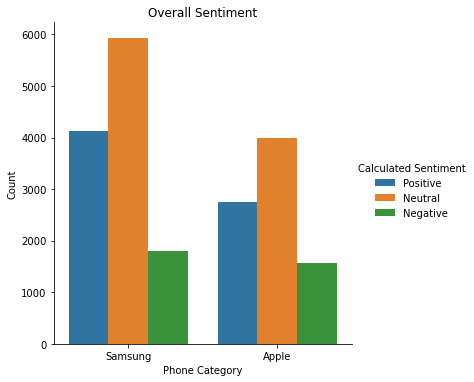

In [178]:
g = sns.catplot(x="Phone_Category", hue='Calculated Sentiment', kind="count", data=merged).set(title="Overall Sentiment")
g.set_ylabels('Count')
g.set_xlabels('Phone Category')

In [179]:
Ntwitter_samsung['Time'] = pd.Categorical(Ntwitter_samsung['Time'], ["Before", "After"])
Ntwitter_apple['Time'] = pd.Categorical(Ntwitter_apple['Time'], ["Before", "After"])
Ntwitter_samsung['Calculated Sentiment'] = pd.Categorical(Ntwitter_samsung['Calculated Sentiment'], ["Positive", "Neutral", "Negative"])
Ntwitter_apple['Calculated Sentiment'] = pd.Categorical(Ntwitter_apple['Calculated Sentiment'], ["Positive", "Neutral", "Negative"])

### Samsung - Non Twitter

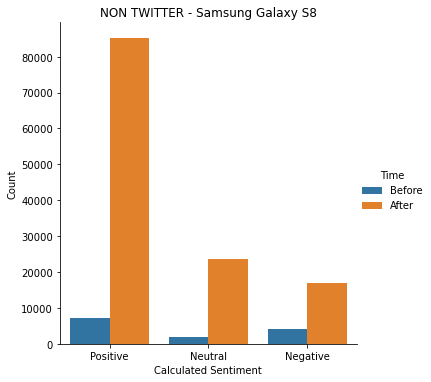

In [180]:
g= sns.catplot(x="Calculated Sentiment", hue="Time", kind="count", data=Ntwitter_samsung).set(title="NON TWITTER - Samsung Galaxy S8")
g.set_ylabels('Count')

### Apple - Non Twitter

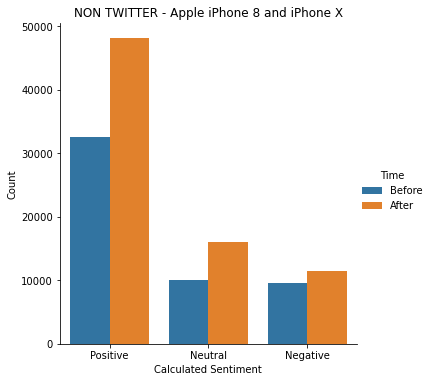

In [181]:
g = sns.catplot(x="Calculated Sentiment", hue="Time", kind="count", data=Ntwitter_apple).set(title="NON TWITTER - Apple iPhone 8 and iPhone X")
g.set_ylabels('Count')

### Samsung - Twitter

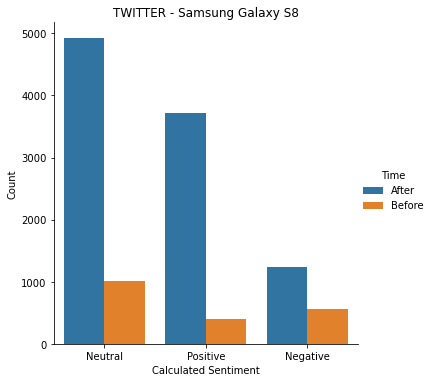

In [182]:
g = sns.catplot(x="Calculated Sentiment", hue="Time", kind="count", data=twitter_samsung).set(title="TWITTER - Samsung Galaxy S8")
g.set_ylabels('Count')

### Apple - Non Twitter

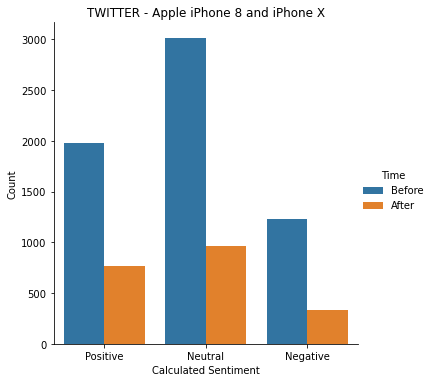

In [183]:
g = sns.catplot(x="Calculated Sentiment", hue="Time", kind="count", data=twitter_apple).set(title="TWITTER - Apple iPhone 8 and iPhone X")
g.set_ylabels('Count')

### SENTIMENT SCORES - Non Twitter

[Text(0.5, 1.0, 'Non Twitter - Sentiment Scores')]

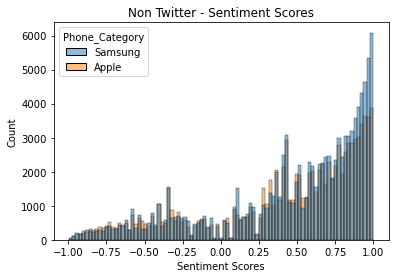

In [184]:
temp1 = data[data['Calculated Sentiment']!='Neutral']
sns.histplot(data=temp1, x='Sentiment Scores', hue='Phone_Category').set(title='Non Twitter - Sentiment Scores')

### SENTIMENT SCORES - Twitter

[Text(0.5, 1.0, 'Twitter - Sentiment Scores')]

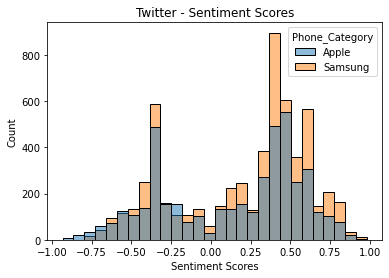

In [185]:
temp2 = twitter[twitter['Calculated Sentiment']!='Neutral']
sns.histplot(data=temp2, x='Sentiment Scores', hue='Phone_Category').set(title='Twitter - Sentiment Scores')

In [186]:
only_apple = twitter_apple.append(Ntwitter_apple, ignore_index=True)
only_samsung = twitter_samsung.append(Ntwitter_samsung, ignore_index=True)
only_apple['month'] = pd.DatetimeIndex(only_apple['Published Date (GMT-04:00) New York']).month
only_samsung['month'] = pd.DatetimeIndex(only_samsung['Published Date (GMT-04:00) New York']).month

### Apple - Monthwise Sentiment

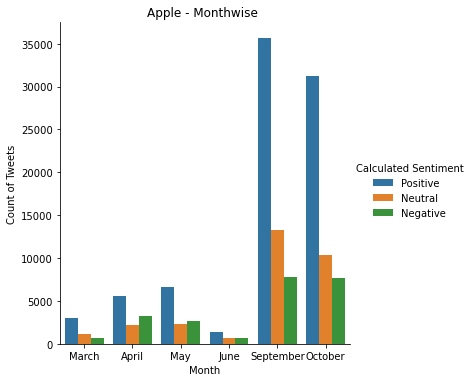

In [187]:
g = sns.catplot(x="month", hue="Calculated Sentiment", kind="count", data=only_apple).set(title="Apple - Monthwise ")
g.set_xticklabels(['March','April','May','June','September','October'])
g.set_xlabels('Month')
g.set_ylabels('Count of Tweets')

### Samsung - Monthwise Sentiment

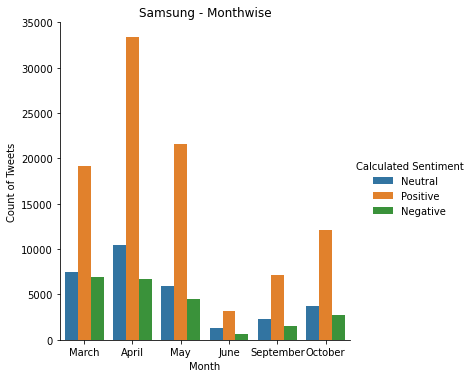

In [188]:
g = sns.catplot(x="month", hue="Calculated Sentiment", kind="count", data=only_samsung).set(title="Samsung - Monthwise")
g.set_xticklabels(['March','April','May','June','September','October'])
g.set_xlabels('Month')
g.set_ylabels('Count of Tweets')

# --------------------X------------------------X------------------------------

## Extra Credit - Predicting Adoption Uptake

In [ ]:
merged.drop('Topic', axis=1, inplace=True)

In [232]:
merged.head()

,Post ID,Sound Bite Text,Source Type,Post Type,Media Type,Domain,Published Date (GMT-04:00) New York,Author Gender,No. of Followers/Daily Unique Visitors,Richness,Cleaned,Cleaned_redudant,Spacy_Lemma,Phone_Category,Time,Sentiment Scores,Calculated Sentiment,month,Unnamed: 0
266706,854083902402580480,Samsung Galaxy S8 and S8 Plus undergo a Batter...,Twitter,Original,Image; Link,twitter.com,2017-04-17,Unknown,50.0,2.0,samsung galaxy s8 s8 plus undergo battery drai...,plus undergo battery drain test,plus undergo battery drain test,Samsung,After,0.0000,Neutral,4,0.0
266707,857765152434860034,"""Another iPhone 8 leak hints at wireless charg...",Twitter,Original,Link,twitter.com,2017-04-27,Male,344.0,2.0,""" iphone 8 leak hints wireless charging "" - - ...",""" 8 leak hints wireless charging "" - - - late ...",""" 8 leak hint wireless charge "" - - - late par...",Apple,Before,0.0772,Positive,4,1.0
266708,875563699074850816,#Unieuro #sconta #Galaxy S8 ed S8+ del 19 e 22...,Twitter,Original,Link,twitter.com,2017-06-16,Unknown,190.0,2.0,#unieuro #sconta #galaxy s8 ed s8 + del 19 e 2...,#unieuro #sconta #galaxy ed + del 19 e 22 % #f...,# unieuro # sconta # e + del 19 e 22 % # fino ...,Samsung,After,0.0000,Neutral,6,2.0
266709,860350966855598082,Enjoy a FREE cup of aromatic coffee from us at...,Twitter,Original,Link,twitter.com,2017-05-05,Unknown,444.0,3.0,enjoy free cup aromatic coffee samsung galaxy ...,enjoy free cup aromatic coffee | + roadshow ha...,enjoy free cup aromatic coffee | + roadshow ha...,Samsung,After,0.7579,Positive,5,3.0
266710,837438402651901953,"According to reports, Samsung has begun mass p...",Twitter,Original,Image; Link,twitter.com,2017-03-02,Unknown,23.0,2.0,"according reports , samsung begun mass product...","according reports , begun mass production upco...","accord report , begin mass production upcoming …",Samsung,Before,0.0000,Neutral,3,4.0


### Samsung

In [233]:
#Adoption Labels
count  = 0
samsung_apple = merged.copy()
adoption = []
index_to_add = [] 
adopt_label = []
for index,row in samsung_apple.iterrows():
    if any(x in row['Spacy_Lemma'] for x in ['buy','bought','buying','purchased','purchasing','purchase']) or row['Sentiment Scores'] > 0.5:
        index_to_add.append(index)
        adopt_label.append(1)
    else:
        adopt_label.append(0)
    count+=1
    

#spec
#lymphoma recall

In [234]:
len(samsung_apple)

20150

In [235]:
sum(adopt_label)

2935

In [236]:
samsung_apple['Adoption'] = adopt_label
samsung_apple

,Post ID,Sound Bite Text,Source Type,Post Type,Media Type,Domain,Published Date (GMT-04:00) New York,Author Gender,No. of Followers/Daily Unique Visitors,Richness,Cleaned,Cleaned_redudant,Spacy_Lemma,Phone_Category,Time,Sentiment Scores,Calculated Sentiment,month,Unnamed: 0,Adoption
266706,854083902402580480,Samsung Galaxy S8 and S8 Plus undergo a Batter...,Twitter,Original,Image; Link,twitter.com,2017-04-17,Unknown,50.0,2.0,samsung galaxy s8 s8 plus undergo battery drai...,plus undergo battery drain test,plus undergo battery drain test,Samsung,After,0.0000,Neutral,4,0.0,0
266707,857765152434860034,"""Another iPhone 8 leak hints at wireless charg...",Twitter,Original,Link,twitter.com,2017-04-27,Male,344.0,2.0,""" iphone 8 leak hints wireless charging "" - - ...",""" 8 leak hints wireless charging "" - - - late ...",""" 8 leak hint wireless charge "" - - - late par...",Apple,Before,0.0772,Positive,4,1.0,0
266708,875563699074850816,#Unieuro #sconta #Galaxy S8 ed S8+ del 19 e 22...,Twitter,Original,Link,twitter.com,2017-06-16,Unknown,190.0,2.0,#unieuro #sconta #galaxy s8 ed s8 + del 19 e 2...,#unieuro #sconta #galaxy ed + del 19 e 22 % #f...,# unieuro # sconta # e + del 19 e 22 % # fino ...,Samsung,After,0.0000,Neutral,6,2.0,0
266709,860350966855598082,Enjoy a FREE cup of aromatic coffee from us at...,Twitter,Original,Link,twitter.com,2017-05-05,Unknown,444.0,3.0,enjoy free cup aromatic coffee samsung galaxy ...,enjoy free cup aromatic coffee | + roadshow ha...,enjoy free cup aromatic coffee | + roadshow ha...,Samsung,After,0.7579,Positive,5,3.0,1
266710,837438402651901953,"According to reports, Samsung has begun mass p...",Twitter,Original,Image; Link,twitter.com,2017-03-02,Unknown,23.0,2.0,"according reports , samsung begun mass product...","according reports , begun mass production upco...","accord report , begin mass production upcoming …",Samsung,Before,0.0000,Neutral,3,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286851,904257629828120577,Need this iPhone 8 ??????,Twitter,Original,No Media,twitter.com,2017-09-03,Unknown,1587.0,1.0,Need iPhone 8 ? ? ?,need 8 ? ? ?,need 8 ? ? ?,Apple,Before,0.0000,Neutral,9,29967.0,0
286852,911600148626644992,"Man flies in from India, queues 13hrs for iPho...",Twitter,Original,Link,twitter.com,2017-09-23,Unknown,257.0,1.0,"man flies india , queues 13hrs iphone 8","man flies india , queues 13hrs 8","man fly india , queues 13hrs 8",Apple,After,0.0000,Neutral,9,29968.0,0
286853,924923926135926784,when you have really nice headphones and the i...,Twitter,Original,No Media,twitter.com,2017-10-30,Unknown,302.0,1.0,nice headphones iPhone 8 < < <,nice headphones 8 < < <,nice headphone 8 < < <,Apple,After,0.4215,Positive,10,29969.0,0
286854,907714982875418624,"Apple unveils three new iPhones: iPhone 8, iPh...",Twitter,Original,Image; Link,twitter.com,2017-09-12,Unknown,413.0,1.0,"apple unveils new iphones : iphone 8 , iphone ...","unveils new iphones : 8 , 8 plus , x …","unveil new : 8 , 8 plus , x …",Apple,Before,0.0000,Neutral,9,29970.0,0


In [237]:
samsung_apple.drop(columns =['Domain','Cleaned', 'Richness','Post ID','Sound Bite Text','Post Type','Author Gender','Cleaned_redudant'],inplace = True)

In [238]:
from dateutil import parser
from datetime import datetime
length_dates = []
text_length = []
for index, row in samsung_apple.iterrows():
    date = row['Published Date (GMT-04:00) New York']
    if(isinstance(date, str)):
        if(row['Phone_Category'] == 'Samsung'):
            length_dates.append((datetime.strptime('2017-03-29','%Y-%m-%d') -datetime.strptime(str(date),'%Y-%m-%d')).days)
            text_length.append(len(row['Spacy_Lemma']))
        elif(row['Phone_Category'] == 'Apple'):
            length_dates.append((datetime.strptime('2017-09-22','%Y-%m-%d') -datetime.strptime(str(date),'%Y-%m-%d')).days)
            text_length.append(len(row['Spacy_Lemma']))
    else:
        length_dates.append(0)
        text_length.append(len(row['Spacy_Lemma']))
samsung_apple['Days from Release'] = length_dates
samsung_apple['Text Length']  = text_length
    

In [239]:
samsung_apple

,Source Type,Media Type,Published Date (GMT-04:00) New York,No. of Followers/Daily Unique Visitors,Spacy_Lemma,Phone_Category,Time,Sentiment Scores,Calculated Sentiment,month,Unnamed: 0,Adoption,Days from Release,Text Length
266706,Twitter,Image; Link,2017-04-17,50.0,plus undergo battery drain test,Samsung,After,0.0000,Neutral,4,0.0,0,-19,31
266707,Twitter,Link,2017-04-27,344.0,""" 8 leak hint wireless charge "" - - - late par...",Apple,Before,0.0772,Positive,4,1.0,0,148,50
266708,Twitter,Link,2017-06-16,190.0,# unieuro # sconta # e + del 19 e 22 % # fino ...,Samsung,After,0.0000,Neutral,6,2.0,0,-79,91
266709,Twitter,Link,2017-05-05,444.0,enjoy free cup aromatic coffee | + roadshow ha...,Samsung,After,0.7579,Positive,5,3.0,1,-37,61
266710,Twitter,Image; Link,2017-03-02,23.0,"accord report , begin mass production upcoming …",Samsung,Before,0.0000,Neutral,3,4.0,0,27,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286851,Twitter,No Media,2017-09-03,1587.0,need 8 ? ? ?,Apple,Before,0.0000,Neutral,9,29967.0,0,19,12
286852,Twitter,Link,2017-09-23,257.0,"man fly india , queues 13hrs 8",Apple,After,0.0000,Neutral,9,29968.0,0,-1,30
286853,Twitter,No Media,2017-10-30,302.0,nice headphone 8 < < <,Apple,After,0.4215,Positive,10,29969.0,0,-38,22
286854,Twitter,Image; Link,2017-09-12,413.0,"unveil new : 8 , 8 plus , x …",Apple,Before,0.0000,Neutral,9,29970.0,0,10,29


In [240]:
#Encoding
media_dummies = pd.get_dummies(samsung_apple['Media Type'], prefix='Media_')
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
samsung_apple = pd.concat([samsung_apple, media_dummies], axis=1)
samsung_apple.head(10)

source_dummies = pd.get_dummies(samsung_apple['Source Type'], prefix='Source_')
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
samsung_apple = pd.concat([samsung_apple, source_dummies], axis=1)
samsung_apple.head(10)


,Source Type,Media Type,Published Date (GMT-04:00) New York,No. of Followers/Daily Unique Visitors,Spacy_Lemma,Phone_Category,Time,Sentiment Scores,Calculated Sentiment,month,...,Text Length,Media__Image,Media__Image; Link,Media__Image; Link; Video,Media__Link,Media__Link; Video,Media__No Media,Media__Video,Media__Video; Link,Source__Twitter
266706,Twitter,Image; Link,2017-04-17,50.0,plus undergo battery drain test,Samsung,After,0.0000,Neutral,4,...,31,0,1,0,0,0,0,0,0,1
266707,Twitter,Link,2017-04-27,344.0,""" 8 leak hint wireless charge "" - - - late par...",Apple,Before,0.0772,Positive,4,...,50,0,0,0,1,0,0,0,0,1
266708,Twitter,Link,2017-06-16,190.0,# unieuro # sconta # e + del 19 e 22 % # fino ...,Samsung,After,0.0000,Neutral,6,...,91,0,0,0,1,0,0,0,0,1
266709,Twitter,Link,2017-05-05,444.0,enjoy free cup aromatic coffee | + roadshow ha...,Samsung,After,0.7579,Positive,5,...,61,0,0,0,1,0,0,0,0,1
266710,Twitter,Image; Link,2017-03-02,23.0,"accord report , begin mass production upcoming …",Samsung,Before,0.0000,Neutral,3,...,48,0,1,0,0,0,0,0,0,1
266711,Twitter,Link,2017-06-16,15.0,like @youtube video 8 major part & feature leak !,Apple,Before,0.4753,Positive,6,...,49,0,0,0,1,0,0,0,0,1
266712,Twitter,Link,2017-06-28,8.0,review & !,Samsung,After,0.0000,Neutral,6,...,10,0,0,0,1,0,0,0,0,1
266713,Twitter,Image,2017-06-28,61.0,brand new + plus 64 gb unlock sm - g 955u1 bla...,Samsung,After,0.0000,Neutral,6,...,58,1,0,0,0,0,0,0,0,1
266714,Twitter,Link,2017-03-13,271.0,"leak image : color option , launcher icon , ba...",Samsung,Before,-0.3182,Negative,3,...,71,0,0,0,1,0,0,0,0,1
266715,Twitter,No Media,2017-04-01,589.0,preordere + start plan . adult life ?,Samsung,After,0.0000,Neutral,4,...,37,0,0,0,0,0,1,0,0,1


In [241]:
samsung = samsung_apple[samsung_apple['Phone_Category'] == 'Samsung']
apple = samsung_apple[samsung_apple['Phone_Category'] == 'Apple']

In [242]:
Train = samsung[samsung['Time'] == 'Before']
Test = samsung[samsung['Time'] == 'After']

In [243]:
Train.drop(columns =['Time','Calculated Sentiment','Unnamed: 0','Phone_Category','Media Type','Published Date (GMT-04:00) New York','Spacy_Lemma','Sentiment Scores','Source Type'],inplace = True)
Test.drop(columns =['Time','Calculated Sentiment','Unnamed: 0','Phone_Category','Media Type','Published Date (GMT-04:00) New York','Spacy_Lemma','Sentiment Scores','Source Type'],inplace = True)

In [244]:
len(Train)

1970

In [245]:
len(Test)

9887

In [246]:
Train

,No. of Followers/Daily Unique Visitors,month,Adoption,Days from Release,Text Length,Media__Image,Media__Image; Link,Media__Image; Link; Video,Media__Link,Media__Link; Video,Media__No Media,Media__Video,Media__Video; Link,Source__Twitter
266710,23.0,3,0,27,48,0,1,0,0,0,0,0,0,1
266714,271.0,3,0,16,71,0,0,0,1,0,0,0,0,1
266719,173.0,3,0,27,28,0,0,0,1,0,0,0,0,1
266721,23.0,3,0,16,50,0,1,0,0,0,0,0,0,1
266728,860.0,3,1,27,42,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282565,14.0,3,1,5,57,0,0,0,1,0,0,0,0,1
282572,116.0,3,0,25,90,0,0,0,0,0,1,0,0,1
282574,313.0,3,0,28,49,0,0,0,1,0,0,0,0,1
282576,850.0,3,0,5,73,0,1,0,0,0,0,0,0,1


In [247]:
Test = Test.iloc[0:1000]

In [248]:
Test.columns

Index(['No. of Followers/Daily Unique Visitors', 'month', 'Adoption',
       'Days from Release', 'Text Length', 'Media__Image',
       'Media__Image; Link', 'Media__Image; Link; Video', 'Media__Link',
       'Media__Link; Video', 'Media__No Media', 'Media__Video',
       'Media__Video; Link', 'Source__Twitter'],
      dtype='object')

In [249]:
#Training
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

x_train = Train.drop(columns = 'Adoption')
y_train = Train['Adoption']
x_test =Test.drop(columns = 'Adoption')
y_test = Test['Adoption']

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 10)]
# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
# print(random_grid)


rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'n_estimators': 244, 'max_depth': 10}


,Features,Importance Score
0,No. of Followers/Daily Unique Visitors,0.389142
3,Text Length,0.324739
2,Days from Release,0.221352
9,Media__No Media,0.033225
5,Media__Image; Link,0.013746
7,Media__Link,0.013237
4,Media__Image,0.003899
10,Media__Video,0.000545
8,Media__Link; Video,0.000115
1,month,0.000000


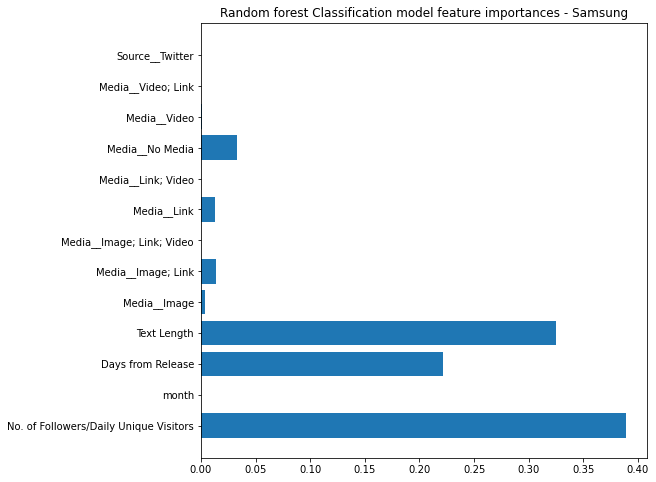

In [250]:
#Validation
rf_best = rf_random.best_estimator_
rf_best.fit(x_train, y_train)
y_pred = rf_best.predict(x_test)

plt.figure(figsize=(8, 8))
plt.barh(x_train.columns, rf_best.feature_importances_)
plt.title('Random forest Classification model feature importances - Samsung')

f_imp_df = pd.DataFrame()
f_imp_df['Features'] = x_train.columns
f_imp_df['Importance Score'] = rf_best.feature_importances_
f_imp_df = f_imp_df.sort_values('Importance Score', ascending = False)
classificationreport = classification_report(y_test,y_pred,output_dict = True)
f_imp_df

In [251]:
classificationreport

{'0': {'precision': 0.8271356783919598,
  'recall': 0.9939613526570048,
  'f1-score': 0.9029072956664836,
  'support': 828},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 172},
 'accuracy': 0.823,
 'macro avg': {'precision': 0.4135678391959799,
  'recall': 0.4969806763285024,
  'f1-score': 0.4514536478332418,
  'support': 1000},
 'weighted avg': {'precision': 0.6848683417085427,
  'recall': 0.823,
  'f1-score': 0.7476072408118485,
  'support': 1000}}

### iPhone

In [252]:
Train = apple[apple['Time'] == 'Before']
Test = apple[apple['Time'] == 'After']

In [253]:
Train.drop(columns =['Time','Calculated Sentiment','Unnamed: 0','Phone_Category','Media Type','Published Date (GMT-04:00) New York','Spacy_Lemma','Sentiment Scores','Source Type'],inplace = True)
Test.drop(columns =['Time','Calculated Sentiment','Unnamed: 0','Phone_Category','Media Type','Published Date (GMT-04:00) New York','Spacy_Lemma','Sentiment Scores','Source Type'],inplace = True)

In [254]:
len(Train)

6220

In [255]:
len(Test)

2073

In [256]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

x_train = Train.drop(columns = 'Adoption')
y_train = Train['Adoption']
x_test =Test.drop(columns = 'Adoption')
y_test = Test['Adoption']

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 10)]
# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
# print(random_grid)


rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'n_estimators': 266, 'max_depth': 28}


,Features,Importance Score
0,No. of Followers/Daily Unique Visitors,0.373441
3,Text Length,0.326878
2,Days from Release,0.251077
1,month,0.023065
7,Media__Link,0.006977
5,Media__Image; Link,0.006241
9,Media__No Media,0.005907
4,Media__Image,0.005166
10,Media__Video,0.001127
8,Media__Link; Video,0.000096


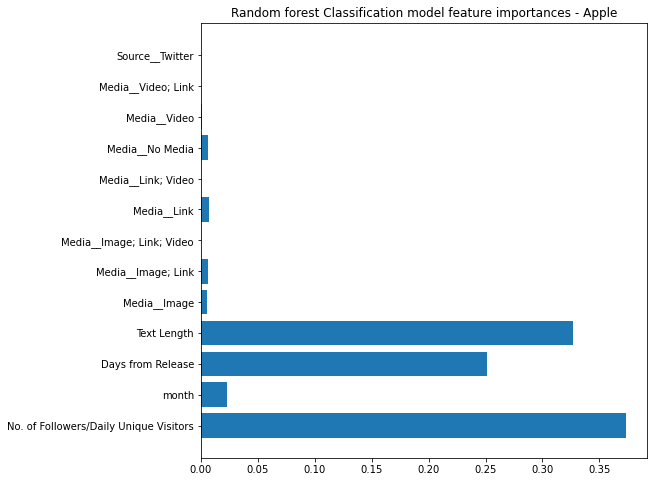

In [257]:
from sklearn.metrics import classification_report

rf_best = rf_random.best_estimator_
rf_best.fit(x_train, y_train)
y_pred = rf_best.predict(x_test)

plt.figure(figsize=(8, 8))
plt.barh(x_train.columns, rf_best.feature_importances_)
plt.title('Random forest Classification model feature importances - Apple')

f_imp_df = pd.DataFrame()
f_imp_df['Features'] = x_train.columns
f_imp_df['Importance Score'] = rf_best.feature_importances_
f_imp_df = f_imp_df.sort_values('Importance Score', ascending = False)
classificationreport = classification_report(y_test,y_pred,output_dict = True)
f_imp_df

In [258]:
classificationreport

{'0': {'precision': 0.7971086739780658,
  'recall': 0.9690909090909091,
  'f1-score': 0.87472647702407,
  'support': 1650},
 '1': {'precision': 0.23880597014925373,
  'recall': 0.037825059101654845,
  'f1-score': 0.06530612244897958,
  'support': 423},
 'accuracy': 0.779064158224795,
 'macro avg': {'precision': 0.5179573220636597,
  'recall': 0.503457984096282,
  'f1-score': 0.4700162997365248,
  'support': 2073},
 'weighted avg': {'precision': 0.6831858357148785,
  'recall': 0.779064158224795,
  'f1-score': 0.7095625551787911,
  'support': 2073}}